## The Taxi game 

In [46]:
#import the libraries for the environment
import gym
import numpy as np
from collections import namedtuple, deque
import random
import tensorflow as tf
%pip install pyvirtualdisplay
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import MSE, MAE
from tensorflow.keras.optimizers import Adam

%pip install gym[toy_text]
%pip install ipykernel
from gym import envs
import datetime
import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from time import sleep

from collections import deque
from collections import defaultdict
# set up the environment
ENV_NAME = "Taxi-v3"
env = gym.make(ENV_NAME)
env.reset()

Note: you may need to restart the kernel to use updated packages.
zsh:1: no matches found: gym[toy_text]
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


444

# Q-learning Implementation

Total Reward at Episode 50: -114
Average timesteps per episode: 8.378
Total Reward at Episode 100: -35
Average timesteps per episode: 13.151
Total Reward at Episode 150: 11
Average timesteps per episode: 16.056
Total Reward at Episode 200: -3
Average timesteps per episode: 17.713
Total Reward at Episode 250: 4
Average timesteps per episode: 18.641
Total Reward at Episode 300: 4
Average timesteps per episode: 19.534
Total Reward at Episode 350: 8
Average timesteps per episode: 20.313
Total Reward at Episode 400: 6
Average timesteps per episode: 21.052
Total Reward at Episode 450: 8
Average timesteps per episode: 21.734
Total Reward at Episode 500: 12
Average timesteps per episode: 22.4
Total Reward at Episode 550: 5
Average timesteps per episode: 23.065
Total Reward at Episode 600: 9
Average timesteps per episode: 23.738
Total Reward at Episode 650: 7
Average timesteps per episode: 24.405
Total Reward at Episode 700: 5
Average timesteps per episode: 25.058
Total Reward at Episode 750: 8

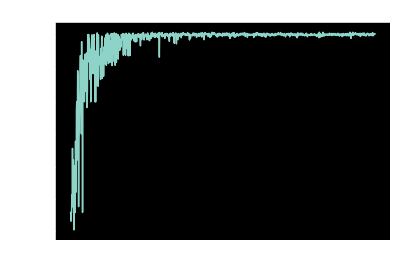

[0. 0. 0. 0. 0. 0.]
[-1.719 -1.719 -1.719 13.59  -9.    -9.   ]
Time taken: 29042


In [47]:
NUM_ACTIONS = env.action_space.n
NUM_STATES = env.observation_space.n
Q = np.zeros([NUM_STATES, NUM_ACTIONS]) 

gamma = 0.9 # discount factor
alpha = 0.9 # learning rate
epsilon = 0.9

total_epochs = 0

eps =[]
rewd = []

for episode in range(1,1001):
    done = False
    total_rewd = 0 # total reward
    obs = env.reset()
    epochs = 0
    steps = []

    while done != True:
      if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
      else:
            # Exploit learned values
            action = np.argmax(Q[obs]) 
            obs2, rew, done, info = env.step(action) 
            Q[obs,action] += alpha * (rew + gamma * np.max(Q[obs2]) - Q[obs,action]) 

            total_rewd +=  rew
            obs = obs2   
            epochs += 1

    total_epochs += epochs

    eps.append(episode)
    rewd.append(total_rewd)
    avgsteps = total_epochs / 1000

    # print out the result for every 50 episodes
    if episode % 50 == 0: 
      
      print('Total Reward at Episode {}: {}'.format(episode,total_rewd))
      print(f"Average timesteps per episode: {avgsteps}")
      

avgrewd = sum(rewd) / 1000

print("Average reward over 1000 episodes:", avgrewd)

plt.plot(eps,rewd)
plt.title("Rewards for Episodes over time")
plt.ylabel("Total Rewards")
plt.xlabel("Number of Episodes")
plt.show()

# Generating Q-table
print(Q[0])
print(Q[499])

print("Time taken:", total_epochs)


In [48]:
#following the policy to take actions delivering max value

total_rewd=0
obs= env.reset()
env.render()
done=False
while done != True: 
    action = np.argmax(Q[obs])
    obs, rew, done, info = env.step(action) #take step using selected action
    total_rewd = total_rewd + rew
    rewd.append(total_rewd)
    env.render()
#Print the reward of these actions
max_rewd = max(rewd)
print("Reward: %r" % max_rewd)  

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |


# Monte Carlo Implementation

In [49]:
#agent class
class Agent:
    def __init__(self, Q, nA=6):
        self.Q = Q
        self.nA = nA
        self.step = self.monteCarloControlStep
        self.alpha = 0.01 
        self.gamma = 0.9  
        self.episode = list()
        
    #action selection function
    def selectAction(self, state, eps):
        if random.random() > eps:
            return np.argmax(self.Q[state])
        else:
            return np.random.choice(self.nA)

    #monte carlo control step function
    def monteCarloControlStep(self, state, action, reward, next_state, done):

        if done:
            rewards = defaultdict(lambda: np.zeros(self.nA))
            for history in reversed(self.episode):
                state, action, reward = history
                rewards[state][action] = reward + self.gamma * rewards[state][action]
                self.Q[state][action] += self.alpha * (rewards[state][action] - self.Q[state][action])
            self.episode.clear()
        else:
            self.episode.append((state, action, reward))

#monte carlo control function
def monteCarloControl(Q = defaultdict(lambda: np.zeros(action_size))):
    agent = Agent(Q)
    totalEps = 1000
    sampleRewards = deque(maxlen=100)

    for episodeI in range(totalEps):
        state = env.reset()
        eps = 0.01
        sampleReward = 0

        while True:
            action = agent.selectAction(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            sampleReward += reward
            if done:
                sampleRewards.append(sampleReward)
                break
            state = next_state

        if episodeI >= 100:
            rewardAvg = sum(sampleRewards) / len(sampleRewards)
            episodeI += 1
            print(f"\rEpisode: {episodeI:6d}/{totalEps} || Average reward: {rewardAvg:7.2f} || eps: {eps:.5f}", end='')


            
env = gym.make("Taxi-v3")
print(env.spec.id)

# Number of possible actions
action_size = env.action_space.n
print(f"Action Space {env.action_space.n}")

# Number of possible states
space_size = env.observation_space.n
print(f"State Space {env.observation_space.n}")

#function call
monteCarloControl()

Taxi-v3
Action Space 6
State Space 500
Episode:   1000/1000 || Average reward: -814.16 || eps: 0.010000

# DQN Implementation

In [50]:
# set global random seeds
tf.random.set_seed(0)
# set up the hyperparameter
MEMORY_SIZE = 800_000
GAMMA = 0.95
ALPHA = 0.1
NUM_STEPS_FOR_UPDATE = 4

In [51]:
# create tuple subclasses with named fields
experience = namedtuple("Experience", 
            field_names=["state", "action", "reward", "next_state", "done"])

#Since gym libries already assign the actions and state for the Taxi game
#We do not need to assign them again
state_size = env.observation_space.n
action_size = env.action_space.n
print("Number of actions:", action_size)
print("Number of states:",state_size)

Number of actions: 6
Number of states: 500


In [52]:
# The network contains one input layer which instantiate a Keras tensor, 
# three hidden dense layer and the final dense layer should have the same size of action space
model = Sequential([
    Input(shape=state_size),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(action_size, activation="linear")
])
target_model = Sequential([
    Input(shape=state_size),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(action_size, activation="linear")
])
print(model.summary())
# use Adam to optimize the error
optimizer = Adam(learning_rate=0.001)


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 128)               64128     
_________________________________________________________________
dense_41 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_42 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_43 (Dense)             (None, 6)                 774       
Total params: 97,926
Trainable params: 97,926
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
# compute the loss and the Q value by using MAE based on Bellman equation
def compute_loss(experiences, gamma, model, target_model):
  states, actions, rewards, next_states, done_vals = experiences
  max_qsa = tf.reduce_max(target_model(next_states), axis=-1)
  y_targets = rewards + (gamma * max_qsa * (1-done_vals))
  q_values = model(states)
  q_values = tf.gather_nd(q_values, 
             tf.stack([tf.range(q_values.shape[0]),
             tf.cast(actions, tf.int32)], axis=1))
  loss = MSE(y_targets, q_values)
  return loss

# set up decay rate 0.01 to update the weight of the target network 
def update_target_network(model, target_model):
  TAU=0.01
  for target_weights, model_weights in zip(target_model.weights, model.weights):
    target_weights.assign(TAU * model_weights + (1.0-TAU) * target_weights)

# To compute gradients based the errors we get and update weights
def agent_learn(experiences, gamma, model, target_model, optimizer):
  with tf.GradientTape() as tape:
    loss = compute_loss(experiences, gamma, model, target_model)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  update_target_network(model, target_model)

# randomly choose action if the generated random floating numbers is less than epsilon
def get_action(q_values, epsilon=0):
  if random.random() > epsilon:
    return np.argmax(q_values.numpy()[0])
  else:
    return random.choice(np.arange(6))

# while training, check if training step is finished and wether size of input data is greater than memory_buffer
def check_update_conditions(iter, NUM_STEPS_FOR_UPDATE, memory_buffer):
  if(iter+1) % NUM_STEPS_FOR_UPDATE == 0 and len(memory_buffer) > 128:
    return True
  else:
    return False

# record the experience in sequence near its endpoints and 
# convert to tensor before fedding to exploit
def get_experiences(memory_buffer):
    experiences = random.sample(memory_buffer, k=64)
    states = tf.convert_to_tensor(np.array([e.state for e in experiences if e is not None]),dtype=tf.float32)
    actions = tf.convert_to_tensor(np.array([e.action for e in experiences if e is not None]), dtype=tf.float32)
    rewards = tf.convert_to_tensor(np.array([e.reward for e in experiences if e is not None]), dtype=tf.float32)
    next_states = tf.convert_to_tensor(np.array([e.next_state for e in experiences if e is not None]),dtype=tf.float32)
    done_vals = tf.convert_to_tensor(np.array([e.done for e in experiences if e is not None]).astype(np.uint8),
                                     dtype=tf.float32)
    return (states, actions, rewards, next_states, done_vals)

# calculate and get the epsilon after decay
def get_new_epsilon(epsilon):
  E_MIN = 0.01
  E_DECAY = 0.005
  return max(E_MIN, E_DECAY * epsilon)

# get next state by categorical data array into numerical values
def get_one_hot_encoding(state, next_state):
  state_arr = np.zeros(500)
  next_state_arr = np.zeros(500)
  state_arr[state] = 1
  next_state_arr[next_state] = 1
  return state_arr, next_state_arr

In [54]:
# set up the condition, train the model and get the average reward
def train(NUM_EPISODES, MAX_TIMESTEPS):
  # NUM_EPISODES = 1000
  # MAX_TIMESTEPS = 100
  memory_buffer = deque(maxlen=MEMORY_SIZE)
  target_model.set_weights(model.get_weights())
  epsilon = 0.02
  points_history = []

  for i in range(NUM_EPISODES):
    state = env.reset()
    state, _ = get_one_hot_encoding(state, 0)
    total_points = 0

    for iter in range(MAX_TIMESTEPS):
      state_qn = np.expand_dims(state, axis=0)
      q_values = model(state_qn)
      action = get_action(q_values, epsilon)
      next_state, reward, done, _ = env.step(action)
      _, next_state = get_one_hot_encoding(0, next_state)
      memory_buffer.append(experience(state, action, reward, next_state, done))
      update = check_update_conditions(iter, NUM_STEPS_FOR_UPDATE, memory_buffer)

      if update:
        experiences = get_experiences(memory_buffer)
        agent_learn(experiences, GAMMA, model, target_model, optimizer)
      state = next_state.copy()
      total_points += reward
      if done:
        break

    points_history.append(total_points)
    avg_points = np.mean(points_history[-100:])
    epsilon = get_new_epsilon(epsilon)
    print(f"\rEpisode {i+1} | Total point average of the last {100} episodes: {avg_points:.2f}", end="")

In [55]:
# call train function to get the result
train(1000,100)

Episode 1000 | Total point average of the last 100 episodes: -102.86